First we're going to import relevant libraries and load our data:

In [1]:
import pandas as pd
raw = pd.read_csv('C:\\Users\Selfisher\Desktop\data.csv', '\t') # read more about this data in the readme file

In [2]:
raw.head(5) # Let's see how the data looks like

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [3]:
raw = raw.drop('age', axis=1).drop('engnat', axis=1).drop('race', axis=1).drop('hand', axis=1).drop('source', axis=1)
# droping these columns for now, but the country column might be relevant

In [4]:
raw.head()

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,US,4,2,5,2,5,1,4,3,...,4,1,3,1,5,1,4,2,5,5
1,2,US,2,2,3,3,3,3,1,5,...,3,3,3,3,2,3,3,1,3,2
2,2,PK,5,1,1,4,5,1,1,5,...,4,5,5,1,5,1,5,5,5,5
3,2,RO,2,5,2,4,3,4,3,4,...,4,3,5,2,4,2,5,2,5,5
4,2,US,3,1,3,3,3,1,3,1,...,3,1,1,1,3,1,3,1,5,3


In [5]:
countries = pd.DataFrame(raw['country'].value_counts())
countries.median() # there are alot of countries with very few subjects

country    10.0
dtype: float64

In [6]:
countries = countries.loc[countries['country'] >= 500]
countries.median()

country    1219.0
dtype: float64

In [7]:
len(countries) # so we're left with 6 countries

6

In [8]:
raw = raw.loc[raw['country'].isin(countries.index)] # keep only those countries

In [9]:
len(raw['country'].value_counts()) # seems like it worked!

6

Now the problem is that most skl algorithms dont know how to use strings for their predictions. So, we will split
the column 'country' into 6 columns of countries which will contain ones and zeros:
one if the subject is from the column's name (country)
or zero if not.
in each row there sould be exactly one "1".

In [10]:
raw['country'].str.get_dummies() # most of the subjects are from the US

,AU,CA,GB,IN,PH,US
0,0,0,0,0,0,1
1,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,0,0,0,1
...,...,...,...,...,...,...
19712,0,0,0,0,0,1
19713,0,0,0,0,0,1
19715,0,0,0,0,0,1
19716,0,0,0,0,0,1


In [11]:
n_data = raw.join(raw['country'].str.get_dummies(), how='right') # combining the two data frames into a n_data

In [12]:
n_data.head()

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O7,O8,O9,O10,AU,CA,GB,IN,PH,US
0,1,US,4,2,5,2,5,1,4,3,...,4,2,5,5,0,0,0,0,0,1
1,2,US,2,2,3,3,3,3,1,5,...,3,1,3,2,0,0,0,0,0,1
4,2,US,3,1,3,3,3,1,3,1,...,3,1,5,3,0,0,0,0,0,1
5,2,US,1,5,2,4,1,3,2,4,...,5,4,5,3,0,0,0,0,0,1
6,2,US,5,1,5,1,5,1,5,4,...,4,3,3,4,0,0,0,0,0,1


In [13]:
n_data = n_data.drop('country', axis=1) # we ahve no use for the 'country' column now

In [14]:
n_data.head(5) 

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O7,O8,O9,O10,AU,CA,GB,IN,PH,US
0,1,4,2,5,2,5,1,4,3,5,...,4,2,5,5,0,0,0,0,0,1
1,2,2,2,3,3,3,3,1,5,1,...,3,1,3,2,0,0,0,0,0,1
4,2,3,1,3,3,3,1,3,1,3,...,3,1,5,3,0,0,0,0,0,1
5,2,1,5,2,4,1,3,2,4,1,...,5,4,5,3,0,0,0,0,0,1
6,2,5,1,5,1,5,1,5,4,4,...,4,3,3,4,0,0,0,0,0,1


In [15]:
n_data['gender'] = n_data['gender'] - 1 # now 1 is female and 0 is male

In [16]:
n_data['gender'].value_counts()

 1    8943
 0    5253
 2      80
-1      19
Name: gender, dtype: int64

In [17]:
n_data = n_data.loc[n_data['gender']!=2] # 3 was "other"

In [18]:
n_data = n_data.loc[n_data['gender']!=-1] # 0 was "rather not say"

In [19]:
n_data['gender'].value_counts() # now it's binary

1    8943
0    5253
Name: gender, dtype: int64

In [20]:
n_data.head(5)

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O7,O8,O9,O10,AU,CA,GB,IN,PH,US
0,0,4,2,5,2,5,1,4,3,5,...,4,2,5,5,0,0,0,0,0,1
1,1,2,2,3,3,3,3,1,5,1,...,3,1,3,2,0,0,0,0,0,1
4,1,3,1,3,3,3,1,3,1,3,...,3,1,5,3,0,0,0,0,0,1
5,1,1,5,2,4,1,3,2,4,1,...,5,4,5,3,0,0,0,0,0,1
6,1,5,1,5,1,5,1,5,4,4,...,4,3,3,4,0,0,0,0,0,1


In [21]:
from sklearn.utils import shuffle

In [22]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [23]:
n_data = shuffle(n_data)

In [24]:
to = 2000
train = n_data[:to]
test = n_data[to:]

In [25]:
trainx = train.drop('gender',axis=1)
trainy = train['gender']

In [26]:
import sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB# best we got is 0.64 accuracy for 0.65 male to female ratio - not good


In [27]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier    # binarize=1.6- for power trick binarize=0.65-no trick
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [42]:
reg = linear_model.LogisticRegression() 

In [44]:
reg = linear_model.LinearRegression() # this model can't use binary data. coutry of origin in this case

In [61]:
reg = KNeighborsClassifier(n_neighbors=40)

In [46]:
reg = linear_model.RidgeClassifierCV() # best so far - we got a 0.75 f1 score

In [31]:
score = cross_val_score(reg, trainx, trainy, cv=5)

In [32]:
n_data = shuffle(n_data)


In [62]:
scrs = [] 
n_to = int(to/5)
tms = 70
for i in range(tms):
    train = shuffle(train) # shuffling the train DF
    trainx = train.drop('gender',axis=1)
    trainy = train['gender']
    reg.fit(trainx[:n_to],trainy[:n_to])
    output = reg.predict(trainx[n_to:])
    scrs.append(sklearn.metrics.f1_score(trainy[n_to:], output)) # adding the f1 score to the list
sum(scrs)/tms 

0.7723360523068838

In [37]:
scrs = []
g_rate = [] # this will later tell us what the female to male ratio was when the prediction took place
tms = 50
for i in range(tms):
    n_data = shuffle(n_data)
    train = n_data[:to]
    trainx = train.drop('gender',axis=1)
    trainy = train['gender']
    scrs.append(cross_val_score(reg, trainx, trainy, cv=5).mean())
    g_rate.append(len(train.loc[train['gender'] == 0]) / len(train.loc[train['gender'] == 1]))
sum(scrs) / len(scrs) - sum(g_rate) / len(g_rate)
# this shows us the difference between the avg of the accuracy and the avg of the female to male ratio in those tests
# so the number we see is the number of percents the model is more acuurate than just guessing 'female' every time

0.11058984287058293

In [153]:
from matplotlib import pyplot as plt
import seaborn as sns

In [154]:
mal = n_data.loc[n_data['gender']==0]
fem = n_data.loc[n_data['gender']==1][:len(mal)]
plot_d = fem.append(mal) 
# making new DataFrame that has a 1:1 femal to male ratio so the info we get will not be bias

In [155]:
len(fem)

5253

In [156]:
len(mal)

5253

Now we're looking for information to see which question should get more or less weight

In [157]:
chrs = {'O','C','E','A','N'}
qs = []
diff = []
for c in chrs:
    print(c+' : ')
    for i in range(10):
        s = c+str(i+1)
        print(s+' : '+str(abs(plot_d.loc[plot_d['gender']==0][s].mean()-plot_d.loc[plot_d['gender']==1][s].mean())))
        qs.append(s)
        diff.append(abs(plot_d.loc[plot_d['gender']==0][s].mean()-plot_d.loc[plot_d['gender']==1][s].mean()))

A : 
A1 : 0.39387016942699393
A2 : 0.20102798400913757
A3 : 0.2847896440129447
A4 : 0.36778983438035384
A5 : 0.3999619265181802
A6 : 0.36455358842566143
A7 : 0.3302874547877406
A8 : 0.3083952027412904
A9 : 0.363030649152865
A10 : 0.15248429468874924
N : 
N1 : 0.5783361888444696
N2 : 0.4186179326099375
N3 : 0.41100323624595436
N4 : 0.13934894346087967
N5 : 0.20159908623643608
N6 : 0.44146202170188475
N7 : 0.28859699219493606
N8 : 0.34037692747001724
N9 : 0.29031029887683246
N10 : 0.12659432705120865
O : 
O1 : 0.1856082238720731
O2 : 0.21340186560060914
O3 : 0.062440510184655906
O4 : 0.1513420902341518
O5 : 0.23072529982866952
O6 : 0.042451932229202294
O7 : 0.1370645345516852
O8 : 0.25033314296592435
O9 : 0.003997715591090412
O10 : 0.20692937369122433
E : 
E1 : 0.0007614696363980045
E2 : 0.34151913192461425
E3 : 0.03597944031981726
E4 : 0.17056919855320762
E5 : 0.1903674090995624
E6 : 0.22939272796497256
E7 : 0.1273557966876071
E8 : 0.026270702455739592
E9 : 0.2528079192842183
E10 : 0.01

<function matplotlib.pyplot.show(close=None, block=None)>

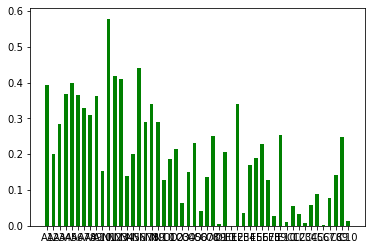

In [158]:
plt.bar(qs,diff, color='g',width=0.6)
plt.show 
#Some questions are more important than others. Let's use that:

In [159]:
for i in range(len(diff)):
    if diff[i] < 0.05:
        n_data = n_data.drop(qs[i], axis=1)

In [160]:
weights = dict(zip(qs,diff))
weights

{'A1': 0.39387016942699393,
 'A2': 0.20102798400913757,
 'A3': 0.2847896440129447,
 'A4': 0.36778983438035384,
 'A5': 0.3999619265181802,
 'A6': 0.36455358842566143,
 'A7': 0.3302874547877406,
 'A8': 0.3083952027412904,
 'A9': 0.363030649152865,
 'A10': 0.15248429468874924,
 'N1': 0.5783361888444696,
 'N2': 0.4186179326099375,
 'N3': 0.41100323624595436,
 'N4': 0.13934894346087967,
 'N5': 0.20159908623643608,
 'N6': 0.44146202170188475,
 'N7': 0.28859699219493606,
 'N8': 0.34037692747001724,
 'N9': 0.29031029887683246,
 'N10': 0.12659432705120865,
 'O1': 0.1856082238720731,
 'O2': 0.21340186560060914,
 'O3': 0.062440510184655906,
 'O4': 0.1513420902341518,
 'O5': 0.23072529982866952,
 'O6': 0.042451932229202294,
 'O7': 0.1370645345516852,
 'O8': 0.25033314296592435,
 'O9': 0.003997715591090412,
 'O10': 0.20692937369122433,
 'E1': 0.0007614696363980045,
 'E2': 0.34151913192461425,
 'E3': 0.03597944031981726,
 'E4': 0.17056919855320762,
 'E5': 0.1903674090995624,
 'E6': 0.229392727964972

In [66]:
n_data.corr()['gender'].sort_values() # another way of seeing which questions are more coorelated with gender 

N2       -0.171515
A5       -0.167353
A7       -0.149384
IN       -0.146893
A1       -0.136123
E2       -0.126040
A3       -0.116715
O5       -0.112165
O10      -0.100968
E6       -0.092181
O8       -0.087153
E9       -0.085732
O1       -0.074156
O7       -0.072603
E4       -0.062195
C8       -0.056832
N4       -0.053275
O3       -0.022730
GB       -0.021964
C10      -0.008509
E1       -0.003097
E10      -0.002291
C3       -0.001774
C6       -0.001502
AU        0.002487
CA        0.004504
O9        0.005717
E8        0.009742
C2        0.010631
O6        0.011818
E3        0.018523
C4        0.022260
C1        0.024468
C5        0.031100
C7        0.033745
E7        0.037352
N10       0.044530
PH        0.050690
O4        0.062097
A10       0.070100
N5        0.073396
E5        0.076280
US        0.080343
O2        0.092258
C9        0.096556
N9        0.097832
A2        0.100988
N7        0.105175
N8        0.117889
A8        0.144043
N6        0.155136
A6        0.156052
A9        0.

In [65]:
reg.fit(trainx[:n_to],trainy[:n_to])

sklearn.metrics.f1_score(test['gender'], reg.predict(test.drop('gender', axis=1)))

0.7647919470942823